<a href="https://colab.research.google.com/github/yashyaks/compute_tasks/blob/main/Lab_1/Lab1.3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Load Dataset

In [ ]:
df=pd.read_csv('/content/sample_data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Visualise Data

<AxesSubplot:>

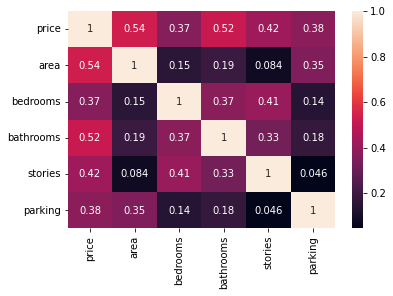

In [ ]:
sns.heatmap(df.corr(),annot=True)

Label categorical data using Labelencoder

In [ ]:
df1=df

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['mainroad']= label_encoder.fit_transform(df1['mainroad'])
df1['guestroom']= label_encoder.fit_transform(df1['guestroom'])
df1['basement']= label_encoder.fit_transform(df1['basement'])
df1['hotwaterheating']= label_encoder.fit_transform(df1['hotwaterheating'])
df1['airconditioning']= label_encoder.fit_transform(df1['airconditioning'])
df1['prefarea']= label_encoder.fit_transform(df1['prefarea'])
df1['furnishingstatus']= label_encoder.fit_transform(df1['furnishingstatus'])

In [ ]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


Split Dataset into training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df1.drop("price",axis=1)
y=df1["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [ ]:
print("Number of samples in whole dataset:",len(df1))
print("Number of samples in training dataset:",len(X_train))
print("Shape of X_train:",X_train.shape)
print("Number of samples in testing dataset:",len(X_test))
print("Shape of X_test:",X_test.shape)

Number of samples in whole dataset: 545
Number of samples in training dataset: 327
Shape of X_train: (327, 12)
Number of samples in testing dataset: 218
Shape of X_test: (218, 12)


Import Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(X_test)

Check Overfitting or Underfitting

In [ ]:
import sklearn.metrics as skm

In [ ]:
mse=skm.mean_squared_error(y_test, y_pred)
mse

1213781296944.313

In [ ]:
reg.score(X_train,y_train)

0.70370007018392

In [ ]:
reg.score(X_test,y_test)

0.63267806061132

Apply Regulisation using Lasso or Ridge Regression

In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50, max_iter=1000,tol=0.1)
lasso_reg.fit(X_test,y_test)

Lasso(alpha=50, tol=0.1)

In [ ]:
lasso_reg.score(X_test,y_test)

0.6514369730376491

In [ ]:
lasso_reg.score(X_train,y_train)

0.6841202378394269

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=60, max_iter=1000,tol=0.1)


In [ ]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=60, max_iter=1000, tol=0.1)

In [ ]:
ridge_reg.score(X_train,y_train)

0.6674302824564882

In [ ]:
ridge_reg.score(X_test,y_test)

0.6080415686521884

Regularisation done Lasso Regression is much effective than Ridge regression